In [1]:
import time
import numpy as np

import tssearch

/home/cgarvic/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
number_of_repetitions = 30

* The currently tested packages can only work with distances that do not allow the computation of data of different nature. For this reason, a public data set obtained from https://finance.yahoo.com/ has been used. All data are continuous.

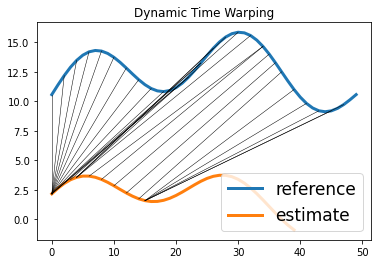

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tssearch.search.query_search import time_series_search
from tssearch.utils.visualisation import plot_alignment

# generates signals. Example with differents lengths
freq = 2
amp = 2
time = np.linspace(0, 2, 100)
ts1 = np.concatenate([amp * np.sin(np.pi * time), np.zeros(100), amp * np.sin(np.pi * time), np.zeros(10)])
ts2 = np.concatenate([np.zeros(10), amp * np.sin(np.pi * time), np.zeros(150), amp * np.sin(np.pi * time), np.zeros(5)])

time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:40]

ts1 = 3 * np.sin(np.pi * time1) + 2.5 * np.sin(4*np.pi * time1)
ts2 = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

dict_distances = {
    "elastic": {"Dynamic Time Warping": {
        "multivariate": "yes",
        "description": "",
        "function": "dtw",
        "parameters": {"dtw_type": "dtw", "alpha": 1},
        "use": "yes"}
    }
}

result = time_series_search(dict_distances, ts1, ts2, output=("number", 1))

plt.figure()
plt.title("Dynamic Time Warping")
plot_alignment(ts1, ts2, result["Dynamic Time Warping"]["path"][0])
plt.legend(fontsize=17, loc="lower right")